<a href="https://colab.research.google.com/github/ismael-rtellez/Neural_Network_Series_Assignments/blob/main/Neural_Network_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural network Series Sprint

### [Problem 1-5]
---


*  Problem 1: Creating code to determine the initial values of the weights
*  Problem 2: Implementation of Forward Propagation
*  Problem 3: Implemetion of Cross-entropy error
*  Problem 4: Back-propagation implementation
*  Problem 5: Estimation

In [29]:
import numpy as np
class ScratchSimpleNeuralNetrowkClassifier:
    """
    Simple three-layer neural network classifier

    Parameters
    ----------

    Attributes
    ----------
    """

    def __init__(self, n_nodes1=None, n_nodes2=None, sigma=0.01, alpha=0.01, epochs=None, batch_size=None, verbose=True):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.sigma = sigma
        self.alpha = alpha
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

        self.train_loss = []
        self.val_loss = []


    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn a neural network classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        n_features = X.shape[1]
        n_output = y.shape[1]


        # Problem 1:Creating code to determine the initial values of the weights
        self.W1 = self.sigma * np.random.randn(n_features, self.n_nodes1)
        self.B1 = np.zeros(self.n_nodes1)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2)
        self.B2 = np.zeros(self.n_nodes2)
        self.W3 = self.sigma * np.random.randn(self.n_nodes2, n_output)
        self.B3 = np.zeros(n_output)

        for epoch in range(self.epochs):
            get_mini_batch = GetMiniBatch(X, y, batch_size=self.batch_size)

            for mini_X, mini_y in get_mini_batch:
                # Problem 2: Implementation of Forward Propagation
                # First Layer
                A1 = np.dot(mini_X, self.W1) + self.B1
                Z1 = self._tanh(A1)

                # Second Layer
                A2 = np.dot(Z1, self.W2) + self.B2
                Z2 = self._tanh(A2)

                # Third Layer
                A3 = np.dot(Z2, self.W3) + self.B3
                Z3 = self._softmax(A3)

                # Problem 3: Implemetion of Cross-entropy error
                loss = self._cross_entropy_error(mini_y, Z3)

                # Problem 4: Back-propagation implementation
                # Third Layer
                dA3 = (Z3 - mini_y) / self.batch_size
                dB3 = np.sum(dA3, axis=0)
                dW3 = np.dot(Z2.T, dA3)
                dZ2 = np.dot(dA3, self.W3.T)

                # Second Layer
                dA2 = dZ2 * (1 - np.tanh(A2)**2)
                dB2 = np.sum(dA2, axis=0)
                dW2 = np.dot(Z1.T, dA2)
                dZ1 = np.dot(dA2, self.W2.T)

                # First Layer
                dA1 = dZ1 * (1 - np.tanh(A1)**2)
                dB1 = np.sum(dA1, axis=0)
                dW1 = np.dot(mini_X.T, dA1)

                # Updating weights and biases
                self.W1 -= self.alpha * dW1
                self.B1 -= self.alpha * dB1
                self.W2 -= self.alpha * dW2
                self.B2 -= self.alpha * dB2
                self.W3 -= self.alpha * dW3
                self.B3 -= self.alpha * dB3

            # Calculating loss for training and validation data
            train_loss = self._calc_loss(X, y)
            self.train_loss.append(train_loss)

            if X_val is not None and y_val is not None:
                val_loss = self._calc_loss(X_val, y_val)
                self.val_loss.append(val_loss)

            if self.verbose:
            # verbose is set to True, the learning process etc. is output.
                print(f"Epoch {epoch+1}/{self.epochs}, Train Loss : {train_loss:.4f}",
                      f", Val Loss: {val_loss:.4f}" if X_val is not None and y_val is not None else "")

    def _calc_loss(self, X, y):
        # Forward propagation for loss calculation
        A1 = np.dot(X, self.W1) + self.B1
        Z1 = self._tanh(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = self._tanh(A2)
        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = self._softmax(A3)
        return self._cross_entropy_error(y, Z3)

    def _tanh(self, x):
        return np.tanh(x)

    def _softmax(self, x):
        # Numerically stable softmax
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def _cross_entropy_error(self, y, y_pred):
        delta = 1e-7 # To avoid log(0)
        return -np.sum(y * np.log(y_pred + delta)) / y.shape[0]

    # Problem 5: Estimation
    def predict(self, X):
        """
        Estimate using a neural network classifier.

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample

        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result
        """
        # Forward propagation for loss calculation
        A1 = np.dot(X, self.W1) + self.B1
        Z1 = self._tanh(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = self._tanh(A2)
        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = self._softmax(A3)

        return np.argmax(Z3, axis=1)

    def predict_proba(self, X):
        """
        Return probability estimates
        """
        A1 = np.dot(X, self.W1) + self.B1
        Z1 = self._tanh(A1)
        A2 = np.dot(Z1, self.W2) + self.B2
        Z2 = self._tanh(A2)
        A3 = np.dot(Z2, self.W3) + self.B3
        Z3 = self._softmax(A3)
        return Z3


class GetMiniBatch:
    """
    Iterator to get a mini-batch

        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        y : The following form of ndarray, shape (n_samples, 1)
          Correct answer value
        batch_size : int
          Batch size
        seed : int
          NumPy random seed
    """

    def __init__(self, X, y, batch_size=20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0] / self.batch_size).astype(int)
        self._counter = 0

    def __len__(self):
        return self._stop

    def __getitem__(self, item):
        p0 = item * self.batch_size
        p1 = item * self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter * self.batch_size
        p1 = self._counter * self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing
X_train = X_train.reshape(-1, 784).astype(np.float32) / 255
X_test = X_test.reshape(-1, 784).astype(np.float32) / 255

# One-hot encode labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from packaging.version import Version
import sklearn

if Version(sklearn.__version__) >= Version("1.2"):
    enc = OneHotEncoder(sparse_output=False)
else:
    enc = OneHotEncoder(sparse=False)

y_train_one_hot = enc.fit_transform(y_train.reshape(-1, 1))
y_test_one_hot = enc.fit_transform(y_test.reshape(-1, 1))

# Splitting into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Converting one-hot back to labels for validation
y_val_labels = np.argmax(y_val, axis=1)

In [5]:
print(X_train.shape)  # (60000, 28, 28)
print(X_test.shape)  # (10000, 28, 28)
print(X_train[0].dtype)  # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

###[Problem 6-8]
---
*  Problem 6: Learning and Estimation

In [32]:
# Problem 6-8: Verification
from sklearn.metrics import accuracy_score

# problem 6: Learning and Estimation
model = ScratchSimpleNeuralNetrowkClassifier(n_nodes1=400, n_nodes2=200, sigma=0.01, alpha=0.01, epochs=10, batch_size=20)
model.fit(X_train, y_train, X_val, y_val)

# Predictions
y_pred = model.predict(X_val)

# Accuracy
accuracy = np.mean(y_pred == y_val_labels)
print(f"Validation Accuracy: {accuracy:.4f}")

Epoch 1/10, Train Loss : 0.6876 , Val Loss: 0.6826
Epoch 2/10, Train Loss : 0.4053 , Val Loss: 0.4052
Epoch 3/10, Train Loss : 0.3439 , Val Loss: 0.3458
Epoch 4/10, Train Loss : 0.3128 , Val Loss: 0.3170
Epoch 5/10, Train Loss : 0.2882 , Val Loss: 0.2946
Epoch 6/10, Train Loss : 0.2676 , Val Loss: 0.2758
Epoch 7/10, Train Loss : 0.2492 , Val Loss: 0.2591
Epoch 8/10, Train Loss : 0.2323 , Val Loss: 0.2439
Epoch 9/10, Train Loss : 0.2165 , Val Loss: 0.2296
Epoch 10/10, Train Loss : 0.2017 , Val Loss: 0.2162
Validation Accuracy: 0.9398


*  Problem 7: Plotting the learning curve

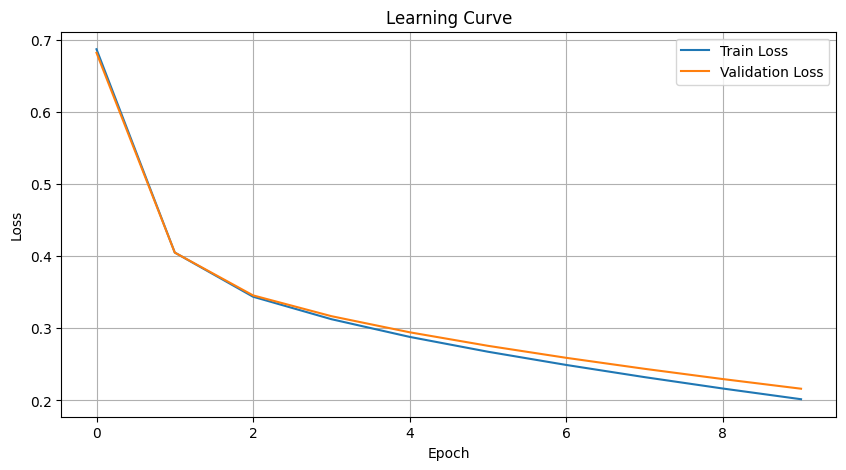

In [33]:
# Problem 7: Plotting the learning curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(model.train_loss, label='Train Loss')
plt.plot(model.val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

*  Problem 8: (Advanced Assignment) Confirmation of Misclassification

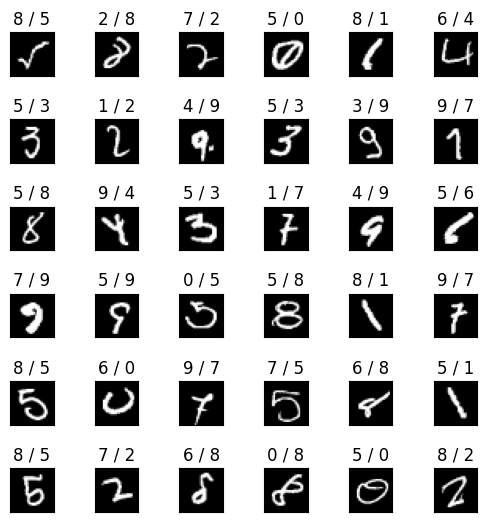

In [34]:
# Problem 8: (Advanced Assignment) Confirmation of Misclassification
num = 36  # How many to display
true_false = y_pred == y_val_labels
false_list = np.where(true_false == False)[0].astype(int) # Changed from np.int to int

if false_list.shape[0] < num:
    num = false_list.shape[0]
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=0.8, bottom=0, top=0.8, hspace=1, wspace=0.5)
for i in range(num):
    ax = fig.add_subplot(6, 6, i + 1, xticks=[], yticks=[])
    ax.set_title("{} / {}".format(y_pred[false_list[i]], y_val_labels[false_list[i]]))
    ax.imshow(X_val.reshape(-1, 28, 28)[false_list[i]], cmap='gray')
plt.show()